In [3]:
import os
import sys

import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
from datetime import date, datetime

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
# http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [15]:
df = pdr.DataReader("GAZP.ME", "yahoo", start=datetime(2018, 1, 1), end=datetime(2022, 1, 1))
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,132.199997,130.630005,131.029999,132.199997,10534020.0,102.487633
2018-01-04,136.199997,132.300003,132.500000,135.889999,32096520.0,105.348305
2018-01-05,137.119995,135.080002,135.600006,137.119995,19981260.0,106.301849
2018-01-09,141.350006,137.600006,138.000000,140.000000,52493450.0,108.534561
2018-01-10,143.429993,139.580002,140.490005,143.429993,51773300.0,111.193657
...,...,...,...,...,...,...
2021-12-24,340.769989,334.549988,339.200012,338.250000,35784290.0,338.250000
2021-12-27,343.500000,340.100006,340.179993,342.779999,26628780.0,342.779999
2021-12-28,346.570007,344.480011,346.299988,345.000000,29673520.0,345.000000


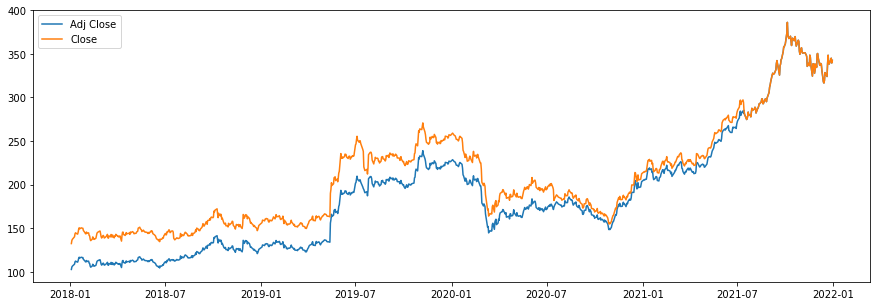

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df["Adj Close"], label="Adj Close")
ax.plot(df["Close"], label="Close")
ax.legend()

plt.show()

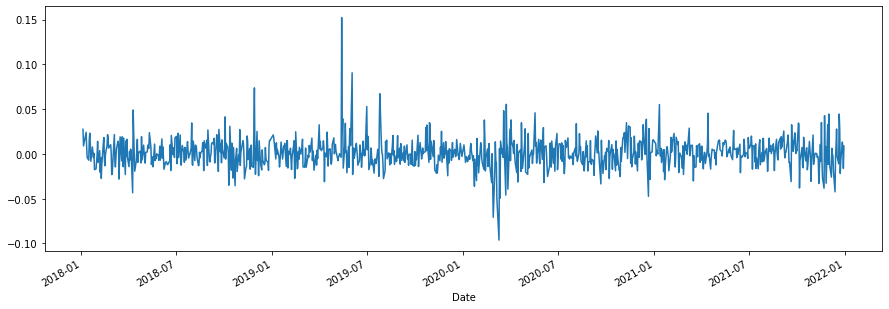

In [17]:
_, ax = plt.subplots(figsize=(15, 5))
log_diff = np.log(df["Adj Close"]).diff()
log_diff.plot(ax=ax)
plt.show()

In [37]:
sigma = 0.157
mu = 0.05
S_0 = 100
N = 2000

t, dt = np.linspace(0, 3, N, retstep=True)
dW_t = np.random.randn(N) * np.sqrt(dt)
W_t = dW_t.cumsum()
S_t = S_0 * np.exp(sigma * W_t + (mu - sigma ** 2 / 2) * t)

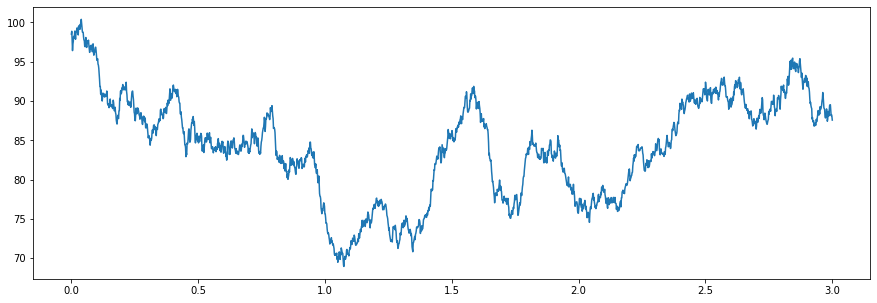

In [38]:
_, ax = plt.subplots(figsize=(15, 5))

ax.plot(t, S_t)

plt.show()

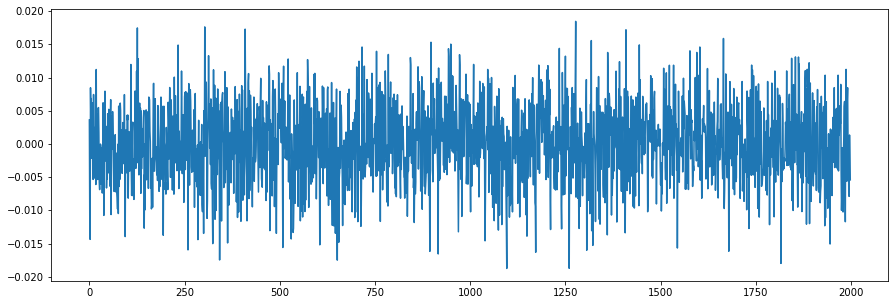

In [39]:
S_log_diff = np.diff(np.log(S_t))

_, ax = plt.subplots(figsize=(15, 5))

ax.plot(S_log_diff)

plt.show()

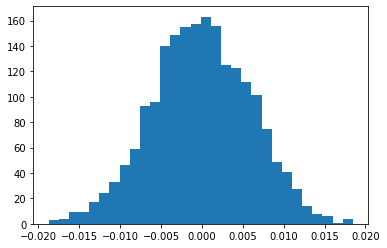

In [40]:
plt.hist(S_log_diff, bins=30)
plt.show()

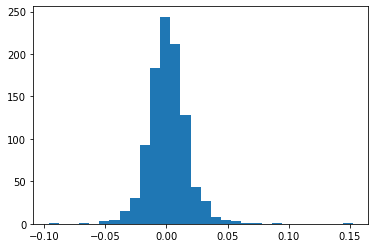

In [41]:
plt.hist(log_diff, bins=30)
plt.show()

In [42]:
def excess_coeff(sample):
    m4 = np.mean(sample ** 4)
    sigma4 = np.std(sample) ** 4
    return m4 / sigma4 - 3

In [43]:
excess_coeff(S_log_diff)

-0.12813415975159748

In [44]:
excess_coeff(log_diff)

9.846061505534907